Khai báo các thư viện cần thiết

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

Đọc tệp dữ liệu

In [47]:
df = pd.read_csv("D:/Code/python/mat3533/practice05/data/iris.data")

Hiển thị dữ liệu

In [12]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


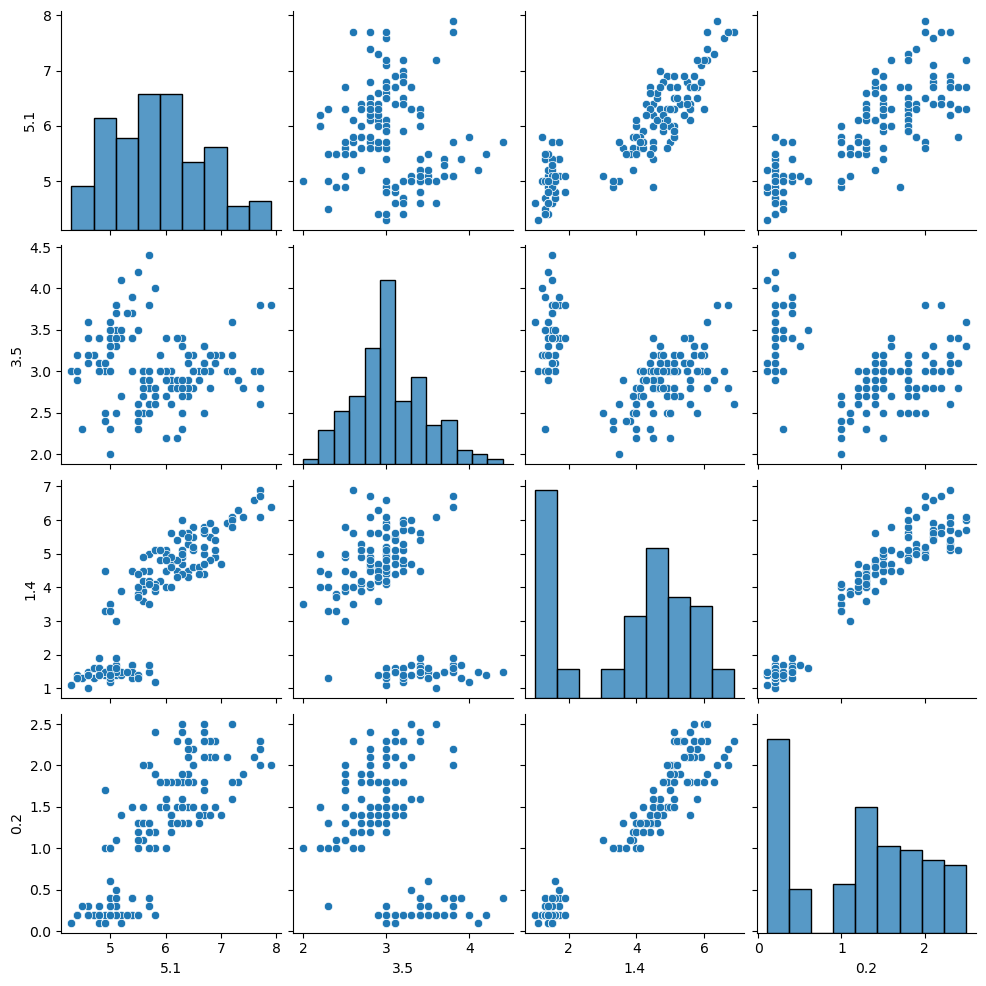

In [27]:
sns.pairplot(df)

          5.1       3.5       1.4       0.2
5.1  0.993333 -0.103092  0.865474  0.811524
3.5 -0.103092  0.993333 -0.412450 -0.348395
1.4  0.865474 -0.412450  0.993333  0.955899
0.2  0.811524 -0.348395  0.955899  0.993333


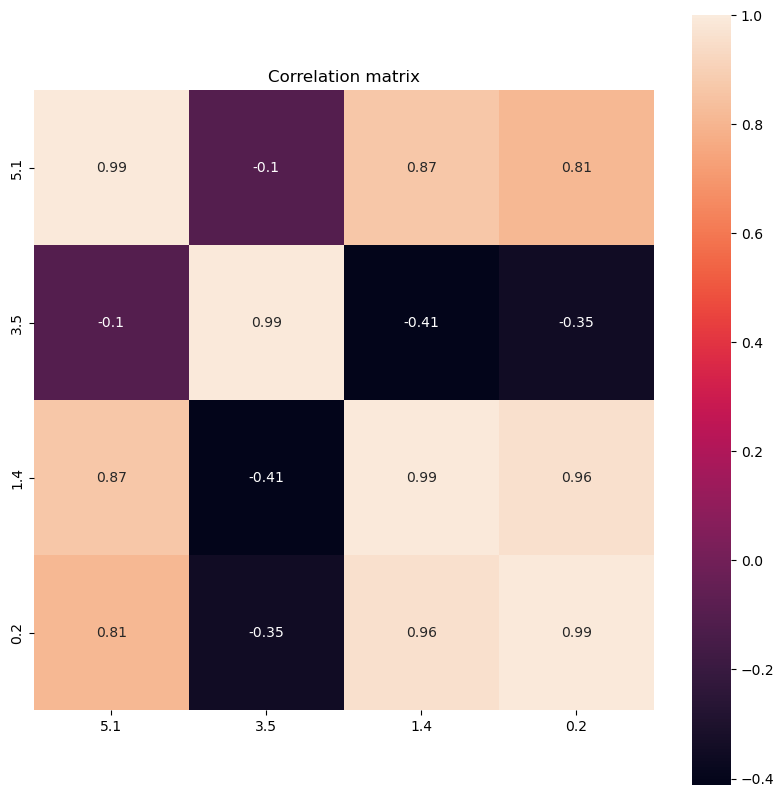

In [57]:
species = df.iloc[:, 4].values.tolist()
X = df.iloc[:, 0:4]
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')
print(X_corr)

tính hệ riêng của ma trận hiệp phương sai (X_corr) bằng
cả 2 công cụ của thư viện Numpy.Linalg là SVD (khai triển kỳ dị) và Eig (Khai triển hệ giá trị-vector
riêng),

In [58]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

(array([2.88543599, 0.91972363, 0.14747089, 0.02070282]),
 array([[ 0.52308496, -0.36956962, -0.72154279,  0.26301409],
        [-0.25956935, -0.92681168,  0.2411952 , -0.12437342],
        [ 0.58184289, -0.01912775,  0.13962963, -0.80099722],
        [ 0.56609604, -0.06381646,  0.63380158,  0.52321917]]))

Hiển thị mức độ “quan trọng” của các trường dữ liệu (gồm 04 trường theo
thứ tự như trong mô tả dữ liệu)

Text(0.5, 0, 'Dimensions')

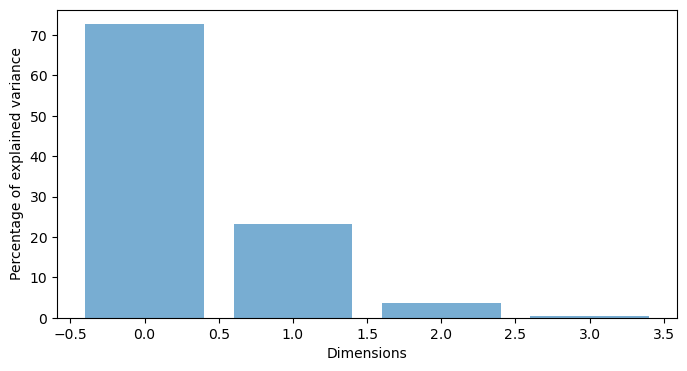

In [59]:
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

Chiếu dữ liệu (X) xuống không gian con 02 chiều ứng với 2 giá trị riêng
lớn nhất (tức là trị riêng [0] và trị riêng [1])

In [63]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

In [64]:
print(pc1)

0      2.107950
1      2.387971
2      2.324879
3      2.405086
4      2.083204
         ...   
144   -1.859771
145   -1.542004
146   -1.509255
147   -1.369096
148   -0.946803
Length: 149, dtype: float64


In [65]:
print(pc2)

0      0.644276
1      0.305833
2      0.562923
3     -0.687591
4     -1.530252
         ...   
144   -0.379344
145    0.908086
146   -0.264606
147   -1.015839
148    0.021821
Length: 149, dtype: float64


Vẽ dữ liệu trong không gian 2 chiều mới thành lập để quan sát:

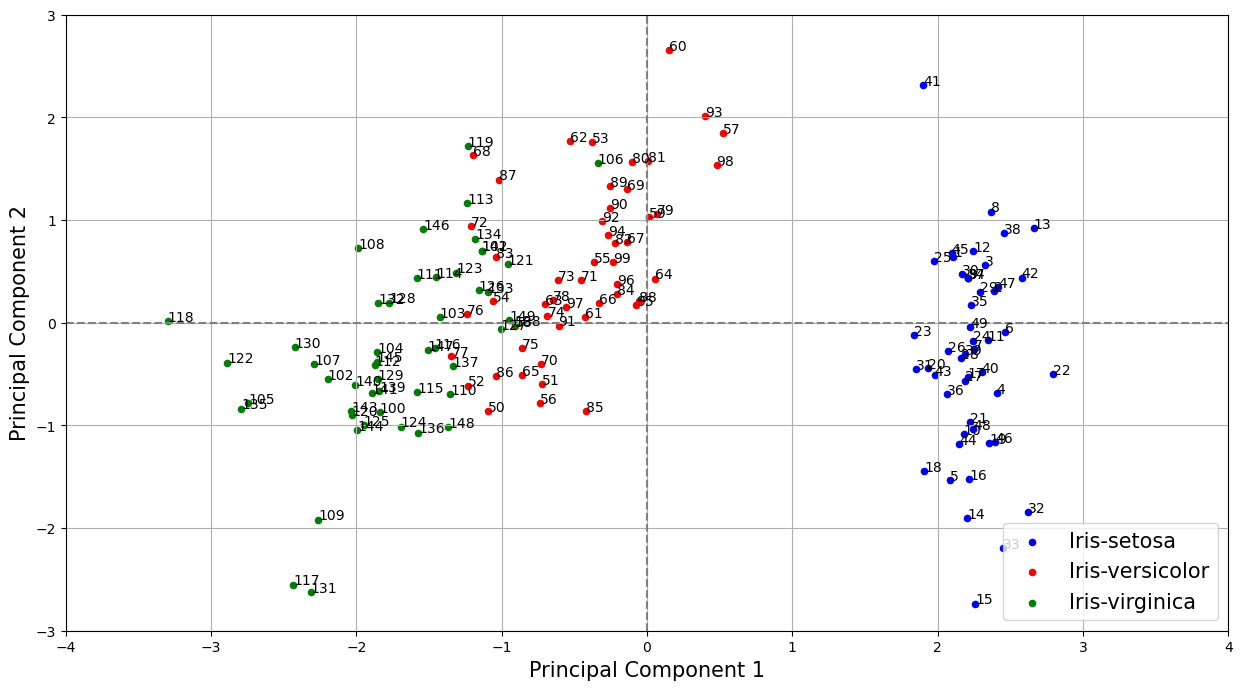

In [66]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
plot_scatter(pc1, pc2)

Sử dụng thư viện sklearn thực hiện yêu cầu trên

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

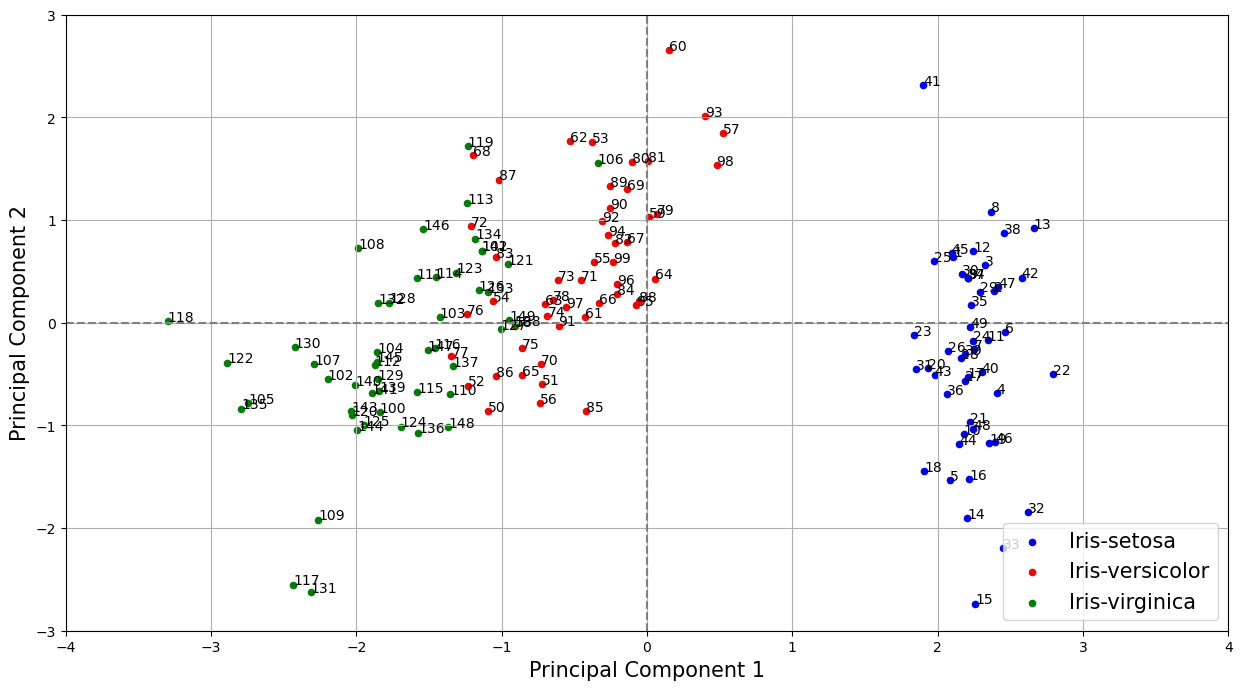

In [69]:
df = pd.read_csv("D:/Code/python/mat3533/practice05/data/iris.data")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 0:4]
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)